## Weather Data Exploration and Forecasting for Joliet, IL

#### Project Overview

In this project, the CSV dataset provided for the assignment was obtained and thoroughly explored. The data was cleaned using techniques to handle missing values, outliers, and inconsistencies, ensuring the accuracy and reliability of the data. Relevant columns such as Temperature, Pressure, Windspeed, Month, and Year were selected, and feature engineering was performed to prepare the data for analysis.

Graphical visualizations were created using libraries like Matplotlib and Seaborn to gain better insights into the data, revealing patterns, trends, and relationships.

For the main objective of predicting weather in Joliet, IL in 2024, a machine learning solution was built using the ARIMA model. The model utilized day, month, and year as input features and predicted the temperature in degrees Fahrenheit or Celsius as the target variable.

The performance of the ARIMA model was evaluated using appropriate metrics like mean squared error (MSE) or root mean squared error (RMSE) to assess its accuracy and predictive capabilities.

***Import Packages***

In [1]:
# Importing the packages that will be used for this project
import pandas as pd
# setting pandas display to avoid scientific notation in DataFrame
pd.options.display.float_format = '{:.2f}'.format
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import colors
from wordcloud import WordCloud
import seaborn as sns
# Set the overall style and color palette
sns.set(style='whitegrid', palette='muted', font='Georgia')
# Set the context and font
sns.set_context('paper', font_scale=1.2)
%matplotlib inline
import sklearn
import calendar
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import ast
from datetime import datetime
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

#### Data Understanding

#### #1. Data Load

In [2]:
# Read dataset as a DataFrame
df = pd.read_csv('EarthCam_DataScience_Data.csv')
df.head(3)

,ObservedAt,ObservedAt_DateTime,Station,Record,ID,datetime,Temperature,Dewpoint,FeelsLike,HeatIndex,...,ConditionType,CloudCondition,CloudReport,Visibility,Clouds,Lightning,SunInfo,MoonInfo,raw,daily_total_precipitation
0,1525172100,5/1/2018 5:55,KJOT,011055Z AUTO 19004KT 10SM CLR 13/03 A3000 RMK ...,220160752,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5463872867481452, 'PhaseName': 'Fu...",AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T013...,NaN
1,1525193700,5/1/2018 11:55,KJOT,011655Z AUTO 23013G23KT 10SM SCT065 27/11 A299...,220215015,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}",...,Cloudy,Scattered,Scattered,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5544029020570569, 'PhaseName': 'Fu...",AUTO 23013G23KT 10SM SCT065 27/11 A2999 RMK AO...,NaN
2,1525215300,5/1/2018 17:55,KJOT,012255Z AUTO 19012G20KT 10SM CLR 28/09 A2991 R...,220262557,"{'timezone': 'America/Chicago', 'string_local'...","{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}",...,Clear,Clear Skies,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...",[],"{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5623766330324756, 'PhaseName': 'Fu...",AUTO 19012G20KT 10SM CLR 28/09 A2991 RMK AO2 T...,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7324 entries, 0 to 7323
Data columns (total 27 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ObservedAt                     7324 non-null   int64  
 1   ObservedAt_DateTime            7324 non-null   object 
 2   Station                        7324 non-null   object 
 3   Record                         7324 non-null   object 
 4   ID                             7324 non-null   int64  
 5   datetime                       7324 non-null   object 
 6   Temperature                    7324 non-null   object 
 7   Dewpoint                       7324 non-null   object 
 8   FeelsLike                      7324 non-null   object 
 9   HeatIndex                      7324 non-null   object 
 10  Windchill                      7324 non-null   object 
 11  Pressure                       7324 non-null   object 
 12  Precipitation                  7324 non-null   o

In [4]:
df.shape

(7324, 27)

#### #2. Data Preprocessing (EDA)

Based on the sample  of the our DataFrame, some columns that appear to be unnecessary or redundant for analysis and visualization purposes:
- <mark>'ID'</mark>: Column contains ID values that may not be relevant for the analysis.
- <mark>'ObservedAt' </mark>: Column seems to contain timestamp values that are already captured in the <mark>'ObservedAt_DateTime'</mark> column.



***#2.1. Time*** &#x231A;

In [5]:
df['ObservedDate'] = pd.to_datetime(df['ObservedAt_DateTime'])

# Extract day, month, and year
df['ObservedDay'] = df['ObservedDate'].dt.day
df['ObservedMonth'] = df['ObservedDate'].dt.month
df['ObservedYear'] = df['ObservedDate'].dt.year

In [6]:
df['ObservedMonth'].unique()

array([ 5,  6,  7,  8,  9, 10, 11, 12,  1,  2,  3,  4], dtype=int64)

In [7]:
df['ObservedDay'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype=int64)

In [8]:
df.ObservedYear.unique()

array([2018, 2019, 2020, 2021, 2022, 2023], dtype=int64)

In [9]:
df.drop(columns=['ObservedAt_DateTime'], axis=1,inplace=True)

In [10]:
df['Station'].unique()

array(['KJOT'], dtype=object)

- <mark>'Station'</mark>: Column contains the same value ('KJOT') for all the records, which may not provide any meaningful information.

In [11]:
print(df['Record'][0])

print('-------------------------------------------------')
print(df['raw'][0])

011055Z AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T01300033
-------------------------------------------------
AUTO 19004KT 10SM CLR 13/03 A3000 RMK AO2 T01300033


- <mark>'Record'</mark> & <mark>'raw'</mark>: Columns appears to contain detailed weather observation records that may not be needed for general analysis and visualization.

In [12]:
print(df['datetime'][0])

{'timezone': 'America/Chicago', 'string_local': '20180501055500', 'iso_8601_local': '2018-05-01T05:55:00-05:00', 'is_local_night': False, 'string_utc': '20180501105500', 'iso_8601_utc': '2018-05-01T10:55:00+00:00', 'unix_timestamp': 1525172100}


- <mark>'datetime'</mark>: Column gives information seems to be related to a specific timestamp in various formats and time zones like <mark>'ObservedAt_DateTime'</mark> column. 

In [13]:
# Compare the values in the two columns
comparison = df['CloudCondition'] == df['CloudReport']

# Check if all values are True
if comparison.all():
    print("The columns contain the same values in each row.")
else:
    print("The columns have different values in at least one row.")

The columns have different values in at least one row.


***#2.2. Lightning*** &#x26A1;

In [14]:
df['Lightning'].unique()

array(['[]'], dtype=object)

- 'Lightning': Column contains  square brackets('[]') for all the records, which may not provide any meaningful information.

In [15]:
#df.info()

In [16]:
# Dropping the unnecessary columns
df.drop(columns=['ID','ObservedAt','datetime','Record','raw','Station','Lightning'], axis=1,inplace=True)

In [17]:
df.head(3)

,Temperature,Dewpoint,FeelsLike,HeatIndex,Windchill,Pressure,Precipitation,Wind,RelativeHumidity,CurrentConditions,...,CloudReport,Visibility,Clouds,SunInfo,MoonInfo,daily_total_precipitation,ObservedDate,ObservedDay,ObservedMonth,ObservedYear
0,"{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 37, 'Celsius': 3}","{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.92, 'InchesOfMercury': 30}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 190, 'Direction': 'So...",0.51,Clear Skies,...,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...","{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5463872867481452, 'PhaseName': 'Fu...",NaN,2018-05-01 05:55:00,1,5,2018
1,"{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 52, 'Celsius': 11}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1015.58, 'InchesOfMercury': 29.99}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 230, 'Direction': 'So...",0.37,Scattered,...,Scattered,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Scattered', 'Coverage': '3/8 -...","{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5544029020570569, 'PhaseName': 'Fu...",NaN,2018-05-01 11:55:00,1,5,2018
2,"{'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': 48, 'Celsius': 9}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Direction': {'Degree': 190, 'Direction': 'So...",0.30,Clear Skies,...,Clear Skies,"[{'Miles': 10, 'Kilometers': 16.1, 'Direction'...","[{'Condition': 'Clear Skies', 'Coverage': '0',...","{'IsSunUp': True, 'Sunrise': {'timezone': 'Ame...","{'Phase': 0.5623766330324756, 'PhaseName': 'Fu...",NaN,2018-05-01 17:55:00,1,5,2018


In [18]:
df.shape

(7324, 23)

In [19]:
#df.describe()

#### #Handling Missing Values

In [20]:
# Checking for NaN values
df.isnull().sum()

Temperature                         0
Dewpoint                            0
FeelsLike                           0
HeatIndex                           0
Windchill                           0
Pressure                            0
Precipitation                       0
Wind                                0
RelativeHumidity                    0
CurrentConditions                   0
CurrentConditionsAbbreviation    6241
ConditionType                       0
CloudCondition                      0
CloudReport                         0
Visibility                          0
Clouds                              0
SunInfo                             0
MoonInfo                            0
daily_total_precipitation        7324
ObservedDate                        0
ObservedDay                         0
ObservedMonth                       0
ObservedYear                        0
dtype: int64

In [21]:
# Finding the ratio of the Null values
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

daily_total_precipitation       100.00
CurrentConditionsAbbreviation    85.21
Temperature                       0.00
CloudCondition                    0.00
ObservedMonth                     0.00
ObservedDay                       0.00
ObservedDate                      0.00
MoonInfo                          0.00
SunInfo                           0.00
Clouds                            0.00
Visibility                        0.00
CloudReport                       0.00
ConditionType                     0.00
Dewpoint                          0.00
CurrentConditions                 0.00
RelativeHumidity                  0.00
Wind                              0.00
Precipitation                     0.00
Pressure                          0.00
Windchill                         0.00
HeatIndex                         0.00
FeelsLike                         0.00
ObservedYear                      0.00
dtype: float64

In [22]:
# Drop DailyTotalPrecipitation column since contains %100 Null value in
df.drop(columns=['daily_total_precipitation'], axis=1,inplace=True)

In [23]:
df['CurrentConditions'].unique()

array(['Clear Skies', 'Scattered', 'In The Vicinity, Thunderstorms',
       'Overcast Sky', 'Broken Sky', 'Mist', 'Light Rain',
       'Thunderstorms, Rain', 'Rain', 'Fog', 'Light Thunderstorms, Rain',
       'Strong Thunderstorms, Rain', 'Light Drizzle', 'Strong Rain',
       'Drizzle', 'In The Vicinity, Thunderstorms, Rain', 'Thunderstorms',
       'Light Snow', 'Haze', 'Freezing, Fog', 'Strong Drizzle',
       '/ Overcast Sky', 'Strong Snow', 'Dry', 'Snow', '/ Broken Sky',
       '/ Scattered'], dtype=object)

In [24]:
# Display an unique values 
df['CurrentConditionsAbbreviation'].unique()

array([nan, 'VCTS', 'BR', '#NAME?', 'TSRA', 'RA', 'FG', 'DZ', 'VCTSRA',
       'TS', 'HZ', 'FZFG', 'UP', 'SN'], dtype=object)

In [25]:
# Define a mapping dictionary with the corresponding abbreviations

condition_mapping = {
    'Clear Skies': 'CLR',
    'Scattered': 'SCT',
    'In The Vicinity, Thunderstorms':'VCTS',
    'Overcast Sky': 'OVC',
    'Broken Sky': 'BKN',
    'Mist': 'MIST',
    'Light Rain': 'LRA',
    'Thunderstorms, Rain': 'TSRA',
    'Rain': 'RA',
    'Fog': 'FG',
    'Light Thunderstorms, Rain': 'TSR',
    'Strong Thunderstorms, Rain': 'STSR',
    'Light Drizzle': 'LDRZ',
    'Strong Rain': 'SR',
    'Drizzle': 'DRZ',
    'In The Vicinity, Thunderstorms, Rain': 'VCTSR',
    'Thunderstorms': 'TS',
    'Light Snow': 'LSN',
    'Haze': 'HZ',
    'Freezing, Fog': 'FZFG',
    'Strong Drizzle': 'SDRZ',
    '/ Overcast Sky': 'OVC',
    'Strong Snow': 'SSN',
    'Dry': 'DRY',
    'Snow': 'SN',
    '/ Broken Sky': 'BKN',
    '/ Scattered': 'SCT'
}

In [26]:
# Assign the correct abbreviations based on the mapping dictionary
df['CurrentConditionsAbbreviation'] = df['CurrentConditions'].map(condition_mapping)

In [27]:
df['CurrentConditionsAbbreviation'].unique()

array(['CLR', 'SCT', 'VCTS', 'OVC', 'BKN', 'MIST', 'LRA', 'TSRA', 'RA',
       'FG', 'TSR', 'STSR', 'LDRZ', 'SR', 'DRZ', 'VCTSR', 'TS', 'LSN',
       'HZ', 'FZFG', 'SDRZ', 'SSN', 'DRY', 'SN'], dtype=object)

In [28]:
df.head(3).T

,0,1,2
Temperature,"{'Fahrenheit': 55, 'Celsius': 13}","{'Fahrenheit': 81, 'Celsius': 27}","{'Fahrenheit': 82, 'Celsius': 28}"
Dewpoint,"{'Fahrenheit': 37, 'Celsius': 3}","{'Fahrenheit': 52, 'Celsius': 11}","{'Fahrenheit': 48, 'Celsius': 9}"
FeelsLike,"{'Type': None, 'Fahrenheit': 55, 'Celsius': 13}","{'Type': None, 'Fahrenheit': 81, 'Celsius': 27}","{'Type': None, 'Fahrenheit': 82, 'Celsius': 28}"
HeatIndex,"{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}"
Windchill,"{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}","{'Fahrenheit': None, 'Celsius': None}"
Pressure,"{'Millibar': 1015.92, 'InchesOfMercury': 30}","{'Millibar': 1015.58, 'InchesOfMercury': 29.99}","{'Millibar': 1012.87, 'InchesOfMercury': 29.91}"
Precipitation,"{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,..."
Wind,"{'Direction': {'Degree': 190, 'Direction': 'So...","{'Direction': {'Degree': 230, 'Direction': 'So...","{'Direction': {'Degree': 190, 'Direction': 'So..."
RelativeHumidity,0.51,0.37,0.30
CurrentConditions,Clear Skies,Scattered,Clear Skies


***#2.3 Temprature*** &#x2109;

In [29]:
df['FeelsLike'] = df['FeelsLike'].str.replace("{'Type': None, ", "")

In [30]:
# Function to extract Fahrenheit value from a string
def extract_fahrenheit(string):
    try:
        fahrenheit_str = string.split("'Fahrenheit': ")[1].split(",")[0]
        return int(fahrenheit_str)
    except (IndexError, ValueError):
        return None

# List of columns to apply the function
columns_to_convert = ['Temperature', 'Dewpoint','FeelsLike','HeatIndex', 'Windchill']

# Apply the function to extract Fahrenheit values for each column
for column in columns_to_convert:
    df[column] = df[column].apply(extract_fahrenheit)

In [31]:
#df.head(3)

In [32]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing.sort_values(ascending=False)

HeatIndex                       90.67
Windchill                       70.14
Temperature                      0.00
CloudCondition                   0.00
ObservedMonth                    0.00
ObservedDay                      0.00
ObservedDate                     0.00
MoonInfo                         0.00
SunInfo                          0.00
Clouds                           0.00
Visibility                       0.00
CloudReport                      0.00
ConditionType                    0.00
Dewpoint                         0.00
CurrentConditionsAbbreviation    0.00
CurrentConditions                0.00
RelativeHumidity                 0.00
Wind                             0.00
Precipitation                    0.00
Pressure                         0.00
FeelsLike                        0.00
ObservedYear                     0.00
dtype: float64

It might not be ideal to simply drop the rows or fill the Null values with a specific value. Thus, it's worth considering other methods to handle missing values more effectively. 

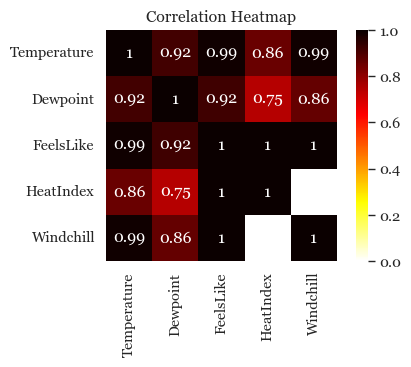

In [33]:
# Create a correlation matrix
corr_matrix = df[columns_to_convert].corr()

# Plot the heatmap
plt.figure(figsize=(5, 3))
sns.heatmap(corr_matrix,vmin=0, vmax=1,  annot=True, cmap='hot_r', square=True)
plt.title('Correlation Heatmap')
plt.show()

- <mark>'FeelsLike'</mark>: Column is linearly dependent on both <mark>'HeatIndex'</mark> and <mark>'Windchill'</mark>, and it can be used as an indicator for imputing missing values in either columns.

In [34]:
# Identify rows with missing values in HeatIndex or Windchill
missing_heatindex = df['HeatIndex'].isnull()
missing_windchill = df['Windchill'].isnull()

# Fill missing values using the corresponding values from FeelsLike
df.loc[missing_heatindex, 'HeatIndex'] = df.loc[missing_heatindex, 'FeelsLike']
df.loc[missing_windchill, 'Windchill'] = df.loc[missing_windchill, 'FeelsLike']

In [35]:
df.tail(3).T

,7321,7322,7323
Temperature,63,73,59
Dewpoint,39,37,39
FeelsLike,63,73,59
HeatIndex,63.00,73.00,59.00
Windchill,63.00,73.00,59.00
Pressure,"{'Millibar': 1016.6, 'InchesOfMercury': 30.02}","{'Millibar': 1013.89, 'InchesOfMercury': 29.94}","{'Millibar': 1014.9, 'InchesOfMercury': 29.97}"
Precipitation,"{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,...","{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0,..."
Wind,"{'Direction': {'Degree': 230, 'Direction': 'So...","{'Direction': {'Degree': 150, 'Direction': 'So...","{'Direction': {'Degree': 160, 'Direction': 'So..."
RelativeHumidity,0.42,0.27,0.48
CurrentConditions,Clear Skies,Clear Skies,Clear Skies


In [36]:
# Convert columns to integers
df[columns_to_convert] = df[columns_to_convert].astype(int)

In [37]:
# Rename columns with "_Fahrenheit" suffix as "F"
for column in columns_to_convert:
    new_column_name = column + 'F'
    df.rename(columns={column: new_column_name}, inplace=True)

In [38]:
#df.ObservedMonth.dtype

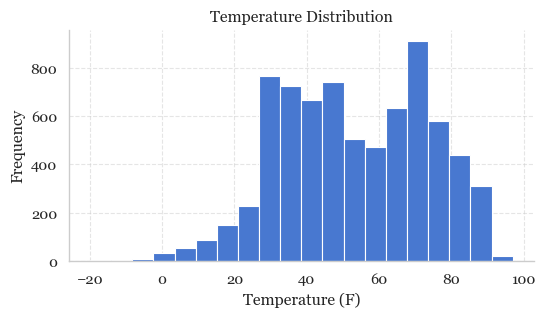

In [39]:
# Plot histogram of temperature
plt.figure(figsize=(6, 3))
plt.hist(df['TemperatureF'], bins=20)  
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')
plt.grid(linestyle='--', alpha=0.5)
sns.despine()
plt.show()

The histogram will display the count of Temperature values falling within each 5-degree range. We can see that the majority of the temperature values in the dataset fall within the range of 30-80 degrees Fahrenheit. This indicates that temperatures in this range are more frequent in the dataset. 

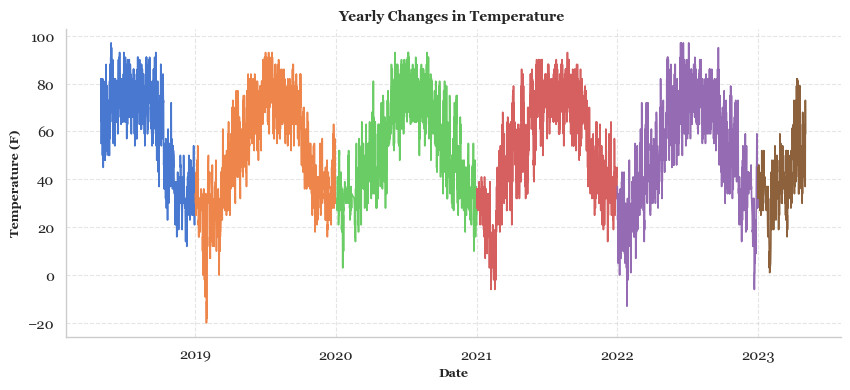

In [40]:
# Group the data by year
grouped_data = df.groupby('ObservedYear')

# Create separate line plots for each year
plt.figure(figsize=(10,4))
for year, group in grouped_data:
    plt.plot(group['ObservedDate'], group['TemperatureF'], label=str(year))

# Customizing the plot
plt.xlabel('Date',fontsize=9, fontweight='bold')
plt.ylabel('Temperature (F)',fontsize=9, fontweight='bold')
plt.title('Yearly Changes in Temperature ',fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(linestyle='--', alpha=0.5)
sns.despine()
plt.show()

By observing the plot, we can see the temperature fluctuations for each year. The lines show how the temperature varies throughout the year, with some years experiencing more significant fluctuations than others. 

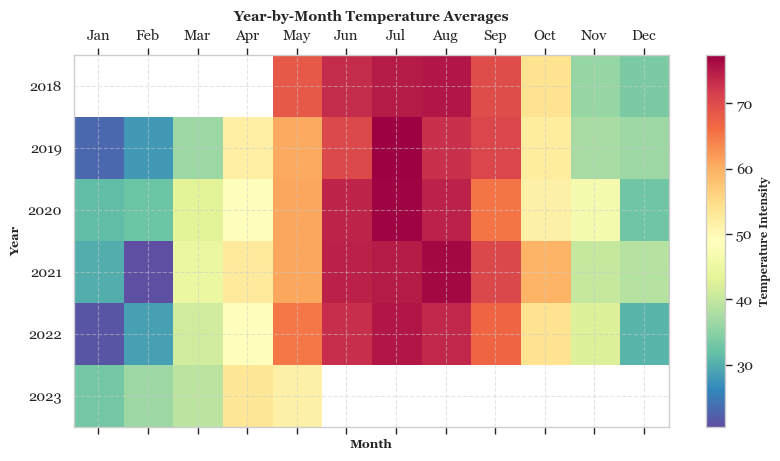

In [41]:
# Group the data by year and month and calculate the average temperature
grouped_temp = df.groupby(['ObservedYear', 'ObservedMonth'])['TemperatureF'].mean()

# Reshape the data into a matrix format
year_matrix_temp = grouped_temp.unstack()
# Get the month names
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Plot the data matrix
plt.matshow(year_matrix_temp, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)

# Customize the plot

# Set the x-axis tick locations and labels
plt.xticks(np.arange(12), month_names)
plt.yticks(np.arange(len(year_matrix_temp.index)), year_matrix_temp.index)
plt.ylabel('Year', fontsize=9, fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.title('Year-by-Month Temperature Averages', fontsize=10, fontweight='bold')

# Add a color bar
color_bar = plt.colorbar()
color_bar.set_label('Temperature Intensity',fontsize=8, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Based on the heatmap, we can observe that *January* and *February* generally have lighter colors, indicating lower average temperatures. This suggests that these months are colder on average.
On the other hand, *June, July,* and *August* are represented by darker colors, indicating higher average temperatures. This indicates that these months are typically hotter.
The heatmap provides a visual representation of the temperature patterns throughout the year, allowing us to easily identify the coldest and hottest months.

***#2.4 Pressure*** &#x23E3;

-<mark>'Pressure'</mark>: Column seems to contain dictionaries with multiple pressure values like *(Millibar, InchesOfMercury)* in different units. Since, Fahrenheit and inches of mercury are commonly used together in weather-related measurements  we can go with  inches of mercury as the unit fir this column


In [42]:
# Extract 'InchesOfMercury' value from 'Pressure' column
df['PressureInHg'] = df['Pressure'].str.extract("'InchesOfMercury': (\d+\.*\d*)", expand=False).astype(float)

In [43]:
df.drop(columns=['Pressure'], axis=1,inplace=True)

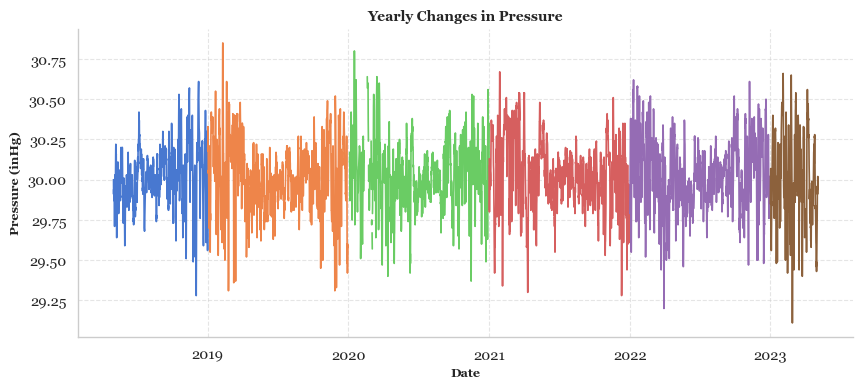

In [44]:
# Create separate line plots for each year
plt.figure(figsize=(10,4))
for year, group in grouped_data:
    plt.plot(group['ObservedDate'], group['PressureInHg'], label=str(year))

# Customizing the plot
plt.xlabel('Date',fontsize=9, fontweight='bold')
plt.ylabel('Pressure (inHg)',fontsize=9, fontweight='bold')
plt.title('Yearly Changes in Pressure',fontsize=10, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(linestyle='--', alpha=0.5)
sns.despine()
plt.show()

By examining the plot, we can observe how the pressure fluctuates throughout the years. The variations in the lines indicate changes in pressure values over time.

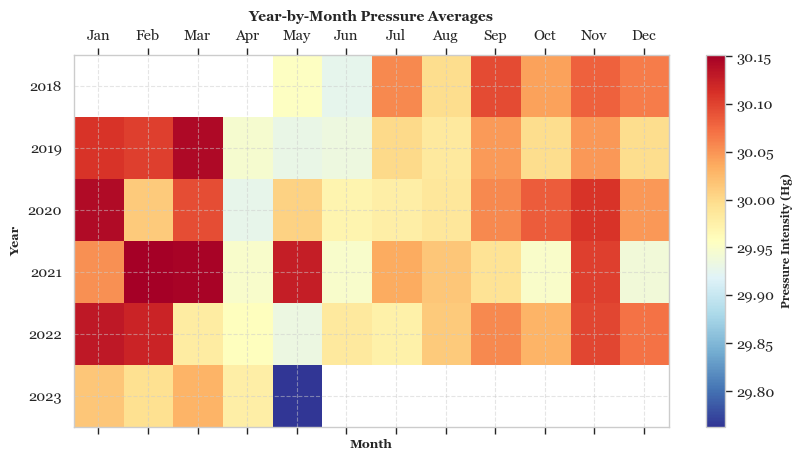

In [45]:
# Group the data by year and month and calculate the average temperature
grouped_pr = df.groupby(['ObservedYear', 'ObservedMonth'])['PressureInHg'].mean()

# Reshape the data into a matrix format
year_matrix_pr = grouped_pr.unstack()

# Plot the data matrix
plt.matshow(year_matrix_pr, interpolation=None, aspect='auto', cmap=plt.cm.RdYlBu_r)

# Set the x-axis tick locations and labels
plt.xticks(np.arange(12), month_names)
plt.yticks(np.arange(len(year_matrix_pr.index)), year_matrix_pr.index)
plt.ylabel('Year', fontsize=9, fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.title('Year-by-Month Pressure Averages', fontsize=10, fontweight='bold')

# Add a color bar
color_bar = plt.colorbar()
color_bar.set_label('Pressure Intensity (Hg)',fontsize=8, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Each square represents a specific month and year combination, and the color intensity reflects the average  pressure level.
From the plot, we can observe that January, February, and March generally exhibit higher pressure values, as indicated by the darker colors. May 2021 stands out as an exception, showing a lower pressure level compared to other years.

***#2.5 Precipitation*** &#x2614;

In [46]:
print(df['Precipitation'][0])
print('----------------------------------------------')
print(df['Precipitation'][1])
print('----------------------------------------------')
print(df['Precipitation'][2])

{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0, 'Cm': 0}, 'Year': {'In': 4.44, 'Cm': 11.28}, 'Month': {'In': 0, 'Cm': 0}, 'Week': {'In': 1.52, 'Cm': 3.86}, 'Day': {'In': 0, 'Cm': 0}, 'Year_snow': {'In': 0, 'Cm': 0}, 'Month_snow': {'In': 0, 'Cm': 0}, 'Week_snow': {'In': 0, 'Cm': 0}, 'Day_snow': {'In': 0, 'Cm': 0}}
----------------------------------------------
{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0, 'Cm': 0}, 'Year': {'In': 4.44, 'Cm': 11.28}, 'Month': {'In': 0, 'Cm': 0}, 'Week': {'In': 1.52, 'Cm': 3.86}, 'Day': {'In': 0, 'Cm': 0}, 'Year_snow': {'In': 0, 'Cm': 0}, 'Month_snow': {'In': 0, 'Cm': 0}, 'Week_snow': {'In': 0, 'Cm': 0}, 'Day_snow': {'In': 0, 'Cm': 0}}
----------------------------------------------
{'Hour': {'In': 0, 'Cm': 0}, 'Snow': {'In': 0, 'Cm': 0}, 'Year': {'In': 4.44, 'Cm': 11.28}, 'Month': {'In': 0, 'Cm': 0}, 'Week': {'In': 1.52, 'Cm': 3.86}, 'Day': {'In': 0, 'Cm': 0}, 'Year_snow': {'In': 0, 'Cm': 0}, 'Month_snow': {'In': 0, 'Cm': 0}, 'Week_snow': {'In': 0, 'Cm': 

In [47]:
df['Precipitation'].dtype

dtype('O')

In [48]:
# Convert the string representation to actual dictionaries
df['Precipitation'] = df['Precipitation'].apply(ast.literal_eval)

# Extract the 'Precipitation_In' values
df['PrecipMonthIn'] = df['Precipitation'].apply(lambda x: x.get('Month', {}).get('In', None))
df['SnowMonthIn'] = df['Precipitation'].apply(lambda x: x.get('Month_snow', {}).get('In', None))


In [49]:
# Create a new column called 'CombinedPrecipIn' by combining the 'PrecipMonthIn' and 'SnowYearIn' columns
df['CombinedPrecipIn'] = df['PrecipMonthIn'].fillna(0) + df['SnowMonthIn'].fillna(0)

# Drop the individual 'PrecipMonthIn' and 'SnowYearIn' columns if needed
df.drop(['PrecipMonthIn', 'SnowMonthIn'], axis=1, inplace=True)

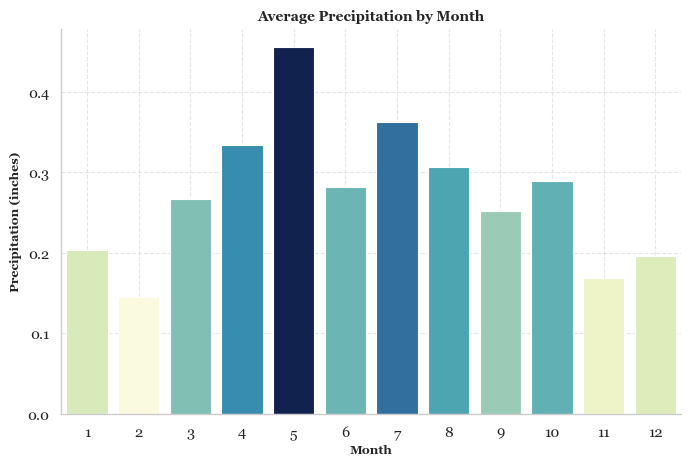

In [51]:
# Calculate average precipitation by month
precipitation_by_month = df.groupby('ObservedMonth')['CombinedPrecipIn'].mean().reset_index()

# Normalize the precipitation values
norm = colors.Normalize(vmin=precipitation_by_month['CombinedPrecipIn'].min(), vmax=precipitation_by_month['CombinedPrecipIn'].max())

# Create a colormap with the normalized values
cmap = plt.cm.YlGnBu

# Create a grouped bar plot
plt.figure(figsize=(8, 5))
sns.barplot(data=precipitation_by_month, x='ObservedMonth', y='CombinedPrecipIn',
            palette=cmap(norm(precipitation_by_month['CombinedPrecipIn'])))
plt.title('Average Precipitation by Month', fontsize=10, fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.ylabel('Precipitation (inches)', fontsize=9, fontweight='bold')
plt.xticks(rotation=0)
plt.grid(linestyle='--', alpha=0.5)
sns.despine()
plt.show()


This bar plot represents the average precipitation (measured in inches) for each month of the year. The height of each bar indicates the average amount of precipitation received during that month. The colors of the bars represent the intensity of precipitation, with darker shades indicating higher values.

In [52]:
df.drop(columns=['Precipitation'], axis=1,inplace=True)

***#2.6 Visibility*** &#128065; 

In [53]:
print(df['Visibility'][1])

[{'Miles': 10, 'Kilometers': 16.1, 'Direction': None, 'DirectionShort': None}]


- <mark>'Visibility'</mark>: Column contains a list of dictionaries, where each dictionary represents a specific visibility measurement. As a &#x2109; for temperature units and we want to focus on the 'Miles' value in this column.
The analysis is  primarily focuses on the numerical measurement of visibility (such as 'Miles), the *Direction* value may not provide significant insights.

In [54]:
df['Visibility'] = df['Visibility'].apply(ast.literal_eval)
df['VisibilityMiles'] = df['Visibility'].apply(lambda x: x[0]['Miles'] if x else None)

In [55]:
df.drop(columns=['Visibility'], axis=1,inplace=True)

In [56]:
#df.columns

***#2.7 Clouds*** &#x2601;

In [57]:
df['Clouds'] = df['Clouds'].apply(ast.literal_eval)
df['CloudCoverage'] = df['Clouds'].apply(lambda x: x[0]['Coverage'] if x else None)
df['CloudAltitudeFeet'] = df['Clouds'].apply(lambda x: x[0]['Altitude']['Feet'] if x else None)

In [58]:
df.head(3)

,TemperatureF,DewpointF,FeelsLikeF,HeatIndexF,WindchillF,Wind,RelativeHumidity,CurrentConditions,CurrentConditionsAbbreviation,ConditionType,...,MoonInfo,ObservedDate,ObservedDay,ObservedMonth,ObservedYear,PressureInHg,CombinedPrecipIn,VisibilityMiles,CloudCoverage,CloudAltitudeFeet
0,55,37,55,55,55,"{'Direction': {'Degree': 190, 'Direction': 'So...",0.51,Clear Skies,CLR,Clear,...,"{'Phase': 0.5463872867481452, 'PhaseName': 'Fu...",2018-05-01 05:55:00,1,5,2018,30.00,0.00,10,0,NaN
1,81,52,81,81,81,"{'Direction': {'Degree': 230, 'Direction': 'So...",0.37,Scattered,SCT,Cloudy,...,"{'Phase': 0.5544029020570569, 'PhaseName': 'Fu...",2018-05-01 11:55:00,1,5,2018,29.99,0.00,10,3/8 - 4/8,6500.00
2,82,48,82,82,82,"{'Direction': {'Degree': 190, 'Direction': 'So...",0.30,Clear Skies,CLR,Clear,...,"{'Phase': 0.5623766330324756, 'PhaseName': 'Fu...",2018-05-01 17:55:00,1,5,2018,29.91,0.00,10,0,NaN


In [59]:
df.isnull().sum()

TemperatureF                        0
DewpointF                           0
FeelsLikeF                          0
HeatIndexF                          0
WindchillF                          0
Wind                                0
RelativeHumidity                    0
CurrentConditions                   0
CurrentConditionsAbbreviation       0
ConditionType                       0
CloudCondition                      0
CloudReport                         0
Clouds                              0
SunInfo                             0
MoonInfo                            0
ObservedDate                        0
ObservedDay                         0
ObservedMonth                       0
ObservedYear                        0
PressureInHg                       15
CombinedPrecipIn                    0
VisibilityMiles                     0
CloudCoverage                       3
CloudAltitudeFeet                3475
dtype: int64

In [60]:
# Fill missing values with the mean
mean_pressure = np.mean(df['PressureInHg'])
df['PressureInHg'] = df['PressureInHg'].fillna(mean_pressure)

In [61]:
#df.dropna(subset=['CloudCoverage'], inplace=True)

- <mark>'CloudAltitudeFeet'</mark>: Column has 50% null values and we have other columns such as *'CloudCoverage', 'ConditionType', 'CloudCondition', and 'CloudReport'* that capture important information about cloud-related data, we can consider excluding the *'CloudAltitudeFeet'* column from  analysis.

In [62]:
df.CloudCoverage.dtype

dtype('O')

In [63]:
df.drop(columns=['Clouds','CloudAltitudeFeet'], axis=1,inplace=True)

In [64]:
df.columns

Index(['TemperatureF', 'DewpointF', 'FeelsLikeF', 'HeatIndexF', 'WindchillF',
       'Wind', 'RelativeHumidity', 'CurrentConditions',
       'CurrentConditionsAbbreviation', 'ConditionType', 'CloudCondition',
       'CloudReport', 'SunInfo', 'MoonInfo', 'ObservedDate', 'ObservedDay',
       'ObservedMonth', 'ObservedYear', 'PressureInHg', 'CombinedPrecipIn',
       'VisibilityMiles', 'CloudCoverage'],
      dtype='object')

In [65]:
df.VisibilityMiles.unique()

array([10,  7,  2,  5,  4,  0,  3,  1], dtype=int64)

In [66]:
df.CloudCoverage.unique()

array(['0', '3/8 - 4/8', '8/8', '5/8 - 7/8', None], dtype=object)

In [67]:
df.CloudCondition.unique()

array(['Clear Skies', 'Scattered',
       'In The Vicinity, Thunderstorms / Clear Skies',
       'Scattered / Broken Sky', 'Scattered / Overcast Sky',
       'Overcast Sky', 'Scattered / Broken Sky / Overcast Sky',
       'Broken Sky', 'Broken Sky / Overcast Sky',
       'In The Vicinity, Thunderstorms / Overcast Sky',
       'Mist / Scattered / Broken Sky',
       'Light Rain / Scattered / Broken Sky', 'Mist / Broken Sky',
       'Light Rain / Broken Sky / Overcast Sky', 'Mist / Overcast Sky',
       'Thunderstorms, Rain / Scattered / Broken Sky / Overcast Sky',
       'Rain / Scattered / Overcast Sky',
       'Mist / Scattered / Overcast Sky', 'Fog / Overcast Sky',
       'Mist / Clear Skies', 'Fog / Vertical Visibility',
       'Mist / Scattered',
       'Light Rain / Scattered / Broken Sky / Overcast Sky',
       'Light Thunderstorms, Rain / Broken Sky / Overcast Sky',
       'Mist / Broken Sky / Overcast Sky',
       'Strong Thunderstorms, Rain / Scattered / Broken Sky',
       'S

Note: Grouping the conditions may result in the loss of specific details and nuances present in each individual condition. 

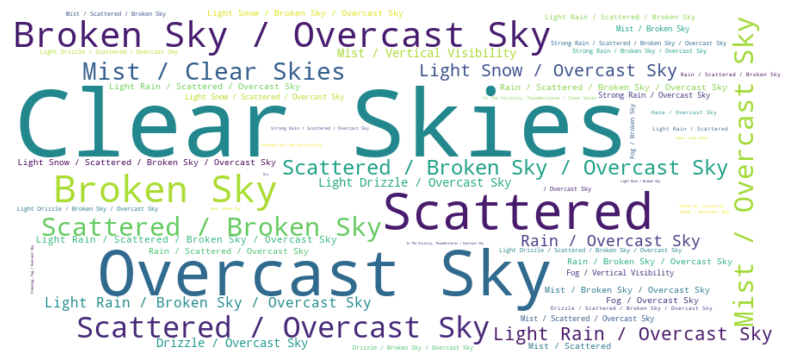

In [68]:
conditions = df['CloudCondition'].tolist()

# Create a dictionary to count the occurrences of each condition
condition_count = {}
for condition in conditions:
    if condition in condition_count:
        condition_count[condition] += 1
    else:
        condition_count[condition] = 1

# Generate word cloud
wordcloud = WordCloud(
    width=900,
    height=400,
    background_color='white',
).generate_from_frequencies(condition_count)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

The larger the word appears in the cloud, the more frequently that cloud condition was observed in the data. This gives us an idea of the prevalence of different cloud conditions in the recorded weather reports

***#2.8. Wind***  &#127788;  &#127788;

In [69]:
print(df['Wind'][1])

{'Direction': {'Degree': 230, 'Direction': 'SouthWest', 'DirectionShort': 'SW', 'VariableDegreeBegin': None, 'VariableDegreeEnd': None}, 'Speed': {'Knots': 13, 'MilesPerHour': 15, 'KilometersPerHour': 24.1, 'Condition': 'Medium'}, 'Gust': {'Knots': 23, 'MilesPerHour': 26.5, 'KilometersPerHour': 42.6}}


In [70]:
# Convert the string values to dictionaries
df['Wind'] = df['Wind'].apply(ast.literal_eval)

df['WindDirection'] = df['Wind'].apply(lambda x: x['Direction']['DirectionShort'])
df['WindSpeed'] = df['Wind'].apply(lambda x: x['Speed']['MilesPerHour'])
df['WindSpeedCondition'] = df['Wind'].apply(lambda x: x['Speed']['Condition'])
df['GustSpeed'] = df['Wind'].apply(lambda x: x['Gust']['MilesPerHour'])

In [71]:
#df.head(4).T

In [72]:
df.WindDirection.unique()

array(['S', 'SW', 'SSW', 'WSW', 'N', 'W', 'NW', 'NE', 'SSE', 'WNW', 'E',
       'NNE', 'ENE', 'ESE', 'SE', 'NNW', None], dtype=object)

In [73]:
df.isnull().sum()

TemperatureF                        0
DewpointF                           0
FeelsLikeF                          0
HeatIndexF                          0
WindchillF                          0
Wind                                0
RelativeHumidity                    0
CurrentConditions                   0
CurrentConditionsAbbreviation       0
ConditionType                       0
CloudCondition                      0
CloudReport                         0
SunInfo                             0
MoonInfo                            0
ObservedDate                        0
ObservedDay                         0
ObservedMonth                       0
ObservedYear                        0
PressureInHg                        0
CombinedPrecipIn                    0
VisibilityMiles                     0
CloudCoverage                       3
WindDirection                      41
WindSpeed                           0
WindSpeedCondition                  0
GustSpeed                        6032
dtype: int64

In [74]:
df.dropna(subset=['WindDirection'], inplace=True)

In [75]:
df.GustSpeed.unique()

array([ nan, 26.5, 23. , 20.7, 24.2, 25.3, 19.6, 21.9, 28.8, 11.5, 10.4,
       17.3, 29.9, 18.4, 16.1, 27.6, 34.5, 31.1, 35.7, 43.7, 33.4, 36.8,
       32.2, 46. , 38. ])

In [76]:
df.drop(columns=['Wind','GustSpeed'], axis=1,inplace=True)

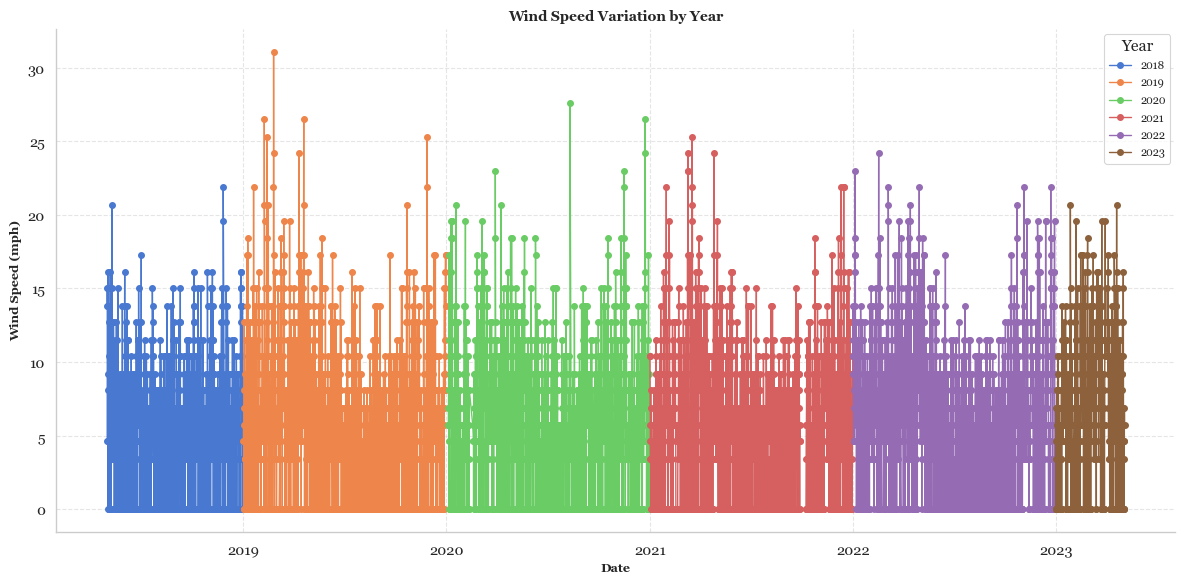

In [77]:
# Group the data by year and plot separate line graphs for each year
groups = df.groupby(df['ObservedYear'])

plt.figure(figsize=(12, 6))
for year, group in groups:
    plt.plot(group['ObservedDate'], group['WindSpeed'], marker='o', 
             markersize=4, linestyle='-', linewidth=1, label=year)

# Set plot title and axis labels
plt.title('Wind Speed Variation by Year', fontsize=10, fontweight='bold')
plt.xlabel('Date', fontsize=9, fontweight='bold')
plt.ylabel('Wind Speed (mph)', fontsize=9, fontweight='bold')

plt.xticks(rotation=0)
sns.despine()
plt.grid(linestyle='--', alpha=0.5)  # Add a grid
plt.legend(title='Year', fontsize=8)

plt.tight_layout()
plt.show()


Note: Graph visualizes how the wind speed has changed over time

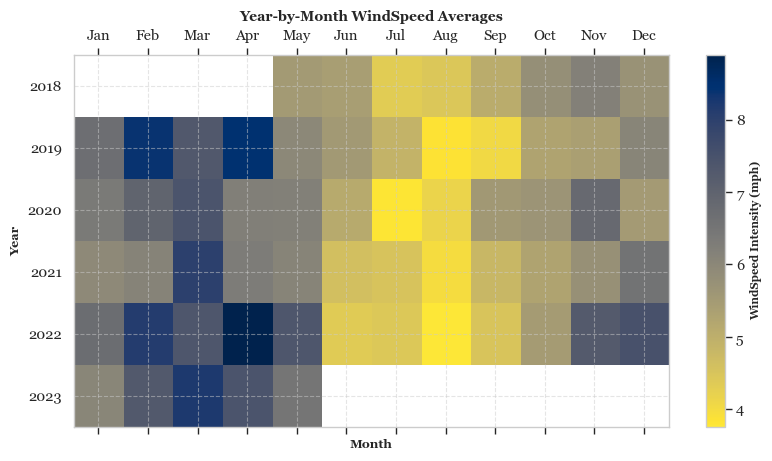

In [78]:
# Group the data by year and month and calculate the average temperature
grouped_ws = df.groupby(['ObservedYear', 'ObservedMonth'])['WindSpeed'].mean()

# Reshape the data into a matrix format
year_matrix_ws = grouped_ws.unstack()

# Plot the data matrix
plt.matshow(year_matrix_ws, interpolation=None, aspect='auto', cmap=plt.cm.cividis_r)

# Customize the plot

# Set the x-axis tick locations and labels
plt.xticks(np.arange(12), month_names)
# Set the y-axis tick locations and labels
plt.yticks(np.arange(len(year_matrix_ws.index)), year_matrix_ws.index)
plt.ylabel('Year', fontsize=9, fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.title('Year-by-Month WindSpeed Averages', fontsize=10, fontweight='bold')

# Add a color bar
color_bar = plt.colorbar()
color_bar.set_label('WindSpeed Intensity (mph)',fontsize=8, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Based on the plot, it appears that the summer months generally have lower average wind speeds compared to the winter and spring months. This observation suggests that during the summer, there tends to be less wind activity on average.

In [79]:
df.WindDirection.unique()

array(['S', 'SW', 'SSW', 'WSW', 'N', 'W', 'NW', 'NE', 'SSE', 'WNW', 'E',
       'NNE', 'ENE', 'ESE', 'SE', 'NNW'], dtype=object)

<Figure size 1200x600 with 0 Axes>

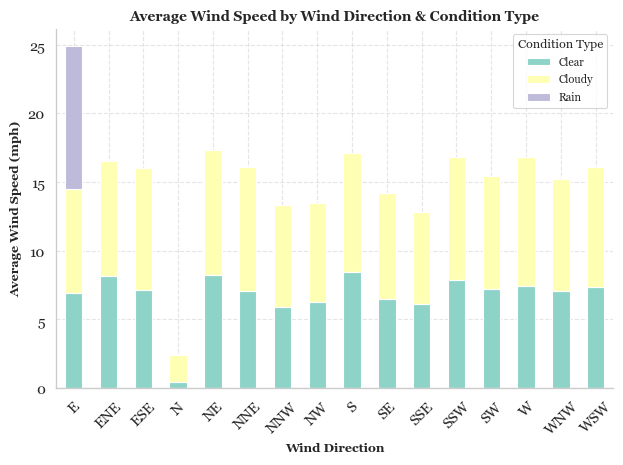

In [80]:
# Group the data by 'WindDirection' and 'ConditionType' and calculate the average wind speed
average_wind_speed_by_direction_condition = df.groupby(['WindDirection', 'ConditionType'])['WindSpeed'].mean().unstack()

# Create a stacked bar plot
plt.figure(figsize=(12, 6))
colors = sns.color_palette("Set3")
average_wind_speed_by_direction_condition.plot(kind='bar', stacked=True, color=colors)

# Set plot title and axis labels
plt.title('Average Wind Speed by Wind Direction & Condition Type', fontsize=10, fontweight='bold')
plt.xlabel('Wind Direction', fontsize=9, fontweight='bold')
plt.ylabel('Average Wind Speed (mph)', fontsize=9, fontweight='bold')

# Rotate x-axis tick labels if needed
plt.xticks(rotation=45)


# Add a legend
plt.legend(title='Condition Type', title_fontsize=9, fontsize=8)

# Show the plot
plt.grid(linestyle='--', alpha=0.5)  # Add a grid
sns.despine()
plt.tight_layout()
plt.show()


Note: graph shows the average wind speed based on both the direction of the wind and the condition type. The different colors represent different condition types, such as sunny, rainy, or cloudy. The height of each colored section within a bar represents the average wind speed for that specific wind direction and condition type.

By looking at the graph, we can see which wind directions and condition types tend to have higher or lower average wind speeds

In [81]:
#df.columns

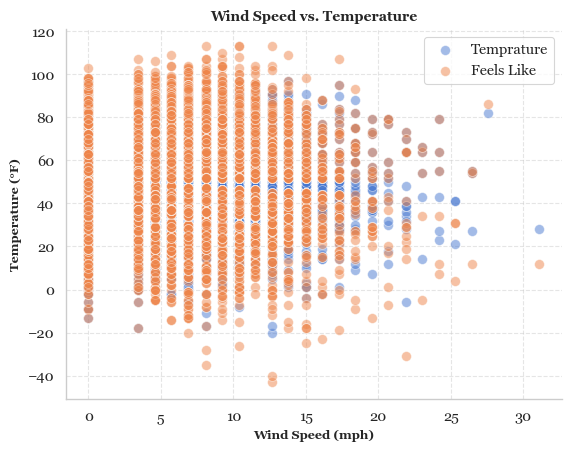

In [82]:
# Set up the scatter plot
sns.scatterplot(data=df, x='WindSpeed', y='TemperatureF', label='Temprature' ,alpha=0.5, s=50)
sns.scatterplot(data=df, x='WindSpeed', y='FeelsLikeF', label='Feels Like', alpha=0.5, s=50)

# Set plot title and axis labels
plt.title('Wind Speed vs. Temperature', fontsize=10, fontweight='bold')
plt.xlabel('Wind Speed (mph)', fontsize=9, fontweight='bold')
plt.ylabel('Temperature (°F)', fontsize=9, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)  # Add a grid

# Remove the spines
sns.despine()
plt.show()


Tis grapgh helps us visualize the relationship between wind speed and temperature, providing insights into how wind affects the perceived or actual temperature. The dots are heavily overlapped, it suggests that there is no clear relationship between wind speed and temperature.

***#2.9. The Sun***  <span style="color:yellow">&#9728;</span>

In [83]:
print(df['SunInfo'][0])

{'IsSunUp': True, 'Sunrise': {'timezone': 'America/Chicago', 'string_local': '20180501054911', 'string_utc': '20180501104911', 'iso_8601_local': '2018-05-01T05:49:11-05:00', 'unix_timestamp': 1525171751}, 'Sunset': {'timezone': 'America/Chicago', 'string_local': '20180501195025', 'string_utc': '20180502005025', 'iso_8601_local': '2018-05-01T19:50:25-05:00', 'unix_timestamp': 1525222225}}


- 'SunInfo': column contains nested dictionaries with information about sunrise and sunset. We will use standardized format values ISO 8601 ('YYYY-MM-DDTHH:MM:SS').

In [84]:
# Convert the 'SunInfo' column from string to dictionary
df['SunInfo'] = df['SunInfo'].apply(ast.literal_eval)

# Extract specific values from the 'SunInfo' column
df['Sunrise'] = df['SunInfo'].apply(lambda x: x['Sunrise']['iso_8601_local'])
df['Sunset'] = df['SunInfo'].apply(lambda x: x['Sunset']['iso_8601_local'])
df['IsSunUp'] = df['SunInfo'].apply(lambda x: x['IsSunUp'])

# Drop the 'SunInfo' column if no longer needed
df = df.drop('SunInfo', axis=1)

In [85]:
df.head(3)

,TemperatureF,DewpointF,FeelsLikeF,HeatIndexF,WindchillF,RelativeHumidity,CurrentConditions,CurrentConditionsAbbreviation,ConditionType,CloudCondition,...,PressureInHg,CombinedPrecipIn,VisibilityMiles,CloudCoverage,WindDirection,WindSpeed,WindSpeedCondition,Sunrise,Sunset,IsSunUp
0,55,37,55,55,55,0.51,Clear Skies,CLR,Clear,Clear Skies,...,30.00,0.00,10,0,S,4.60,Calm,2018-05-01T05:49:11-05:00,2018-05-01T19:50:25-05:00,True
1,81,52,81,81,81,0.37,Scattered,SCT,Cloudy,Scattered,...,29.99,0.00,10,3/8 - 4/8,SW,15.00,Medium,2018-05-01T05:49:11-05:00,2018-05-01T19:50:25-05:00,True
2,82,48,82,82,82,0.30,Clear Skies,CLR,Clear,Clear Skies,...,29.91,0.00,10,0,S,13.80,Medium,2018-05-01T05:49:11-05:00,2018-05-01T19:50:25-05:00,True


-  Further we will extract relevant information such as the hour of sunrise and sunset  and calculate the duration of daylight.

In [86]:
# Check the current format of the values
print(df['Sunrise'].head())

0    2018-05-01T05:49:11-05:00
1    2018-05-01T05:49:11-05:00
2    2018-05-01T05:49:11-05:00
3    2018-05-02T05:47:54-05:00
4    2018-05-02T05:47:54-05:00
Name: Sunrise, dtype: object


In [87]:
# Parse the datetime strings and extract the hour component
df['SunriseHH'] = df['Sunrise'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').hour if isinstance(x, str) else x)
df['SunsetHH'] = df['Sunset'].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S%z').hour if isinstance(x, str) else x)

In [88]:
# Calculate the time difference between the sunrise and sunset times to obtain the duration of daylight
df['DaylightDuration'] = df['SunsetHH'] - df['SunriseHH']

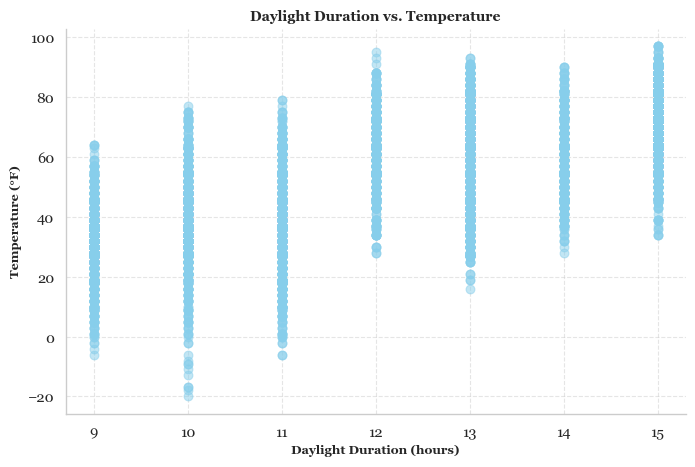

In [89]:
# Create a scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df['DaylightDuration'], df['TemperatureF'], s=40, color='skyblue', alpha=0.5)

# Set plot title and axis labels
plt.title('Daylight Duration vs. Temperature', fontsize=10, fontweight='bold')
plt.xlabel('Daylight Duration (hours)', fontsize=9, fontweight='bold')
plt.ylabel('Temperature (°F)', fontsize=9, fontweight='bold')

# Add gridlines
plt.grid(linestyle='--', alpha=0.5)
sns.despine()
# Show the plot
plt.show()

The scatter plot shows a scattered distribution of points, indicating that there is no strong linear relationship between daylight duration and temperature. However, there are some interesting observations:

- There is a slight tendency for higher temperatures to occur during longer daylight durations, but the relationship is not strictly linear.


In [90]:
# Drop the 'Sunset' & 'Sunrise' columns since no longer needed
df.drop(columns=['Sunset','Sunrise'], axis=1,inplace=True)

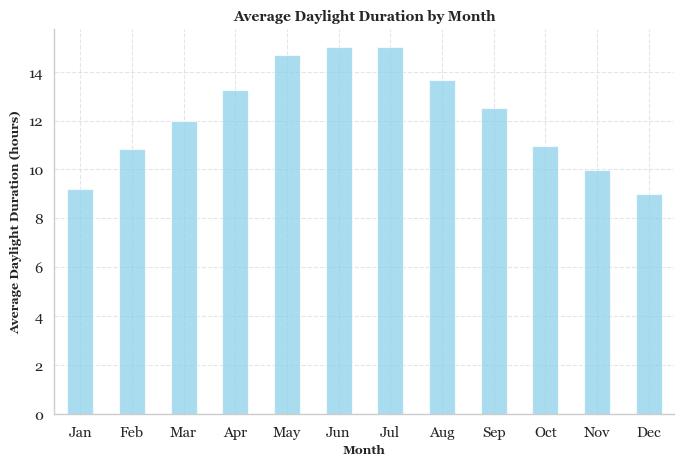

In [91]:
# Group the data by month and calculate the average daylight duration
average_daylight_duration = df.groupby('ObservedMonth')['DaylightDuration'].mean()

# Create the bar plot
plt.figure(figsize=(8, 5))
average_daylight_duration.plot(kind='bar', color='skyblue',alpha=0.7)

# Set plot title and axis labels
plt.title('Average Daylight Duration by Month', fontsize=10, fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.ylabel('Average Daylight Duration (hours)', fontsize=9, fontweight='bold')

# Customize the x-axis tick labels
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(range(12), month_labels)
sns.despine()
plt.grid(linestyle='--', alpha=0.5)
plt.xticks(rotation=0)
plt.show()

This plot provides an overview of how daylight duration varies throughout the months. From the plot, we can observe the following:

- The months with the highest average daylight duration are likely to be in the warmer months, such as May,June and July, where the days are longer.
- The months with the lowest average daylight duration are likely to be in the winter months, such as December and January, where the days are shorter.
- There is a gradual increase in average daylight duration from the winter months to the summer months and a gradual decrease from the summer months to the winter months.

In [92]:
#df.columns

***#2.10. The Moon***   &#x1F319;  

In [93]:
print(df['MoonInfo'][0])

{'Phase': 0.5463872867481452, 'PhaseName': 'Full Moon', 'Illumination': 0.9789126937625077, 'Age': 16.14, 'IsMoonUp': True, 'Moonrise': {'timezone': 'America/Chicago', 'string_local': '19691231180000', 'string_utc': '19700101000000', 'iso_8601_local': '1969-12-31T18:00:00-06:00', 'unix_timestamp': False}, 'Moonset': {'timezone': 'America/Chicago', 'string_local': '20230607084000', 'string_utc': '20230607134000', 'iso_8601_local': '2023-06-07T08:40:00-05:00', 'unix_timestamp': 1686145200}}


Studying temperature patterns or precipitation, moonrise and moonset times may not be directly relevant and can be excluded from the analysis.

In [94]:
# Convert the 'MoonInfo' column from string to dictionary
df['MoonInfo'] = df['MoonInfo'].apply(ast.literal_eval)

# Extract specific values from the 'MoonInfo' column
df['MoonPhase'] = df['MoonInfo'].apply(lambda x: x['Phase'])
df['MoonPhaseName'] = df['MoonInfo'].apply(lambda x: x['PhaseName'])
df['MoonIllumintion'] = df['MoonInfo'].apply(lambda x: x['Illumination'])
df['MoonAge'] = df['MoonInfo'].apply(lambda x: x['Age'])
df['IsMoonUp'] = df['MoonInfo'].apply(lambda x: x['IsMoonUp'])

# Drop the 'MoonInfo' column since no longer needed
df = df.drop('MoonInfo', axis=1)

In [95]:
#df.columns

In [96]:
df.dropna(subset=['WindDirection'], inplace=True)

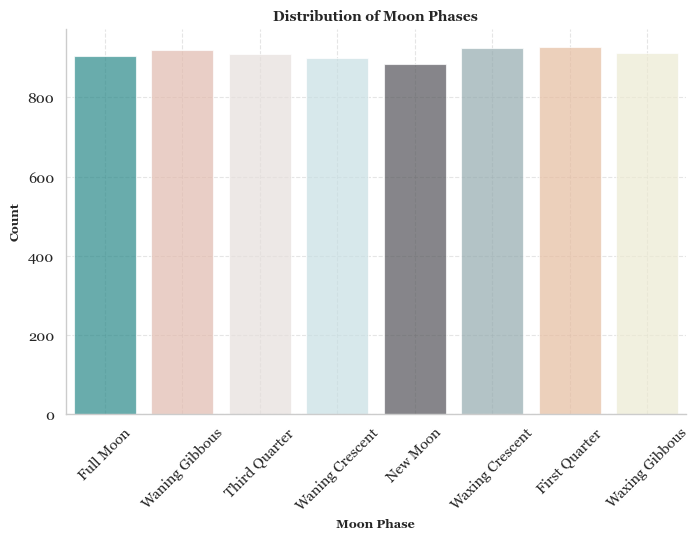

In [97]:
# Create a count plot for Moon Phase
plt.figure(figsize=(8, 5))
moon_colors = ['#199999', '#EAB5A5', '#E7DEDB', '#C2E3E8', '#525159', '#8EADB2', '#F1BA93', '#F0EDCE']
sns.countplot(data=df, x='MoonPhaseName', palette=moon_colors,alpha=0.7)
plt.xlabel('Moon Phase', fontsize=9, fontweight='bold')
plt.ylabel('Count',fontsize=9, fontweight='bold')
plt.title('Distribution of Moon Phases', fontsize=10,fontweight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

This plot provides an overview of the distribution of moon phases and allows us to visually compare their relative frequencies.  We can observe that most of the moon phases appear to be relatively equally common.

In [98]:
df.MoonPhaseName.unique()

array(['Full Moon', 'Waning Gibbous', 'Third Quarter', 'Waning Crescent',
       'New Moon', 'Waxing Crescent', 'First Quarter', 'Waxing Gibbous'],
      dtype=object)

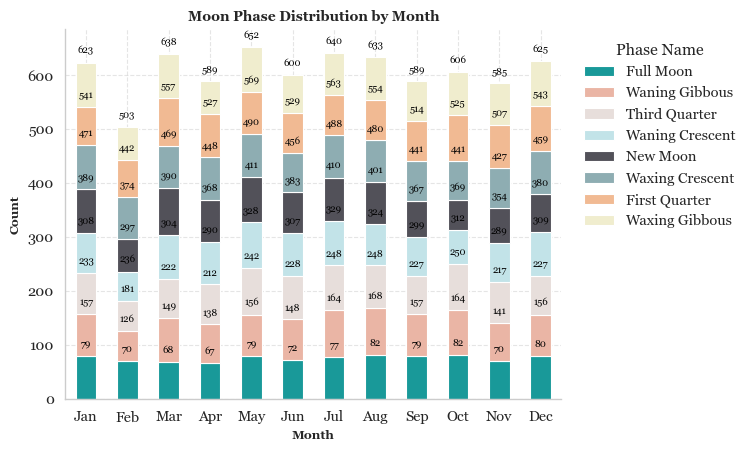

In [99]:
# Reorder the moon phase categories based on desired order
moon_phases = ['Full Moon', 'Waning Gibbous', 'Third Quarter', 'Waning Crescent', 
               'New Moon', 'Waxing Crescent', 'First Quarter', 'Waxing Gibbous']

# Group the data by month and moon phase and calculate the count
grouped_mphases = df.groupby(['ObservedMonth', 'MoonPhaseName']).size().unstack()
grouped_mphases = grouped_mphases[moon_phases]

# Create a stacked bar plot
ax = grouped_mphases.plot(kind='bar', stacked=True, color=moon_colors)

# Manually add labels outside the bars
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=7, color='black', padding=5)
    
# Customize the plot's title and axis labels
plt.title('Moon Phase Distribution by Month', fontsize=10, fontweight='bold')
plt.xlabel('Month',  fontsize=9, fontweight='bold')
plt.ylabel('Count',  fontsize=9, fontweight='bold')
plt.legend(title='Moon Phase')

# Adjust the legend position to be outside of the plot box
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1), title='Phase Name', ncol=1, frameon=False)
# Get the list of month names and change xticks
month_names = [calendar.month_abbr[i] for i in range(1, 13)] 
plt.xticks(range(12), month_names, rotation=0)

sns.despine()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

The stacked bars allow us to compare the relative occurrence of different moon phases within each month.

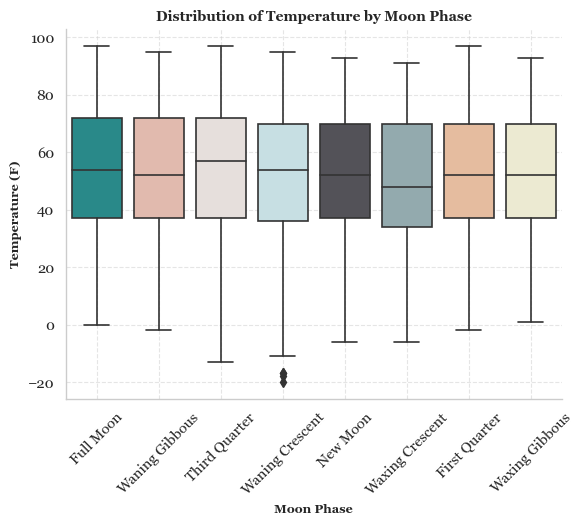

In [100]:
# Create the box plot
sns.boxplot(data=df, x='MoonPhaseName', y='TemperatureF', palette=moon_colors)

# Customize the plot's title and axis labels
plt.title('Distribution of Temperature by Moon Phase',  fontsize=10, fontweight='bold')
plt.xlabel('Moon Phase', fontsize=9, fontweight='bold')
plt.ylabel('Temperature (F)', fontsize=9, fontweight='bold')
plt.xticks(rotation=45)
sns.despine()
plt.grid(linestyle='--', alpha=0.5)
plt.show()

Note: The box plot illustrates the distribution of temperatures based on different moon phases. The central line inside each box represents the median temperature.
Looking at the plot, we can see that the "Waning Crescent" moon phase has some outliers, indicated by the individual data points outside the whiskers. These outliers suggest that during the "Waning Crescent" phase, there were some unusually high or low temperature readings compared to the overall distribution.

In [101]:
#df.columns

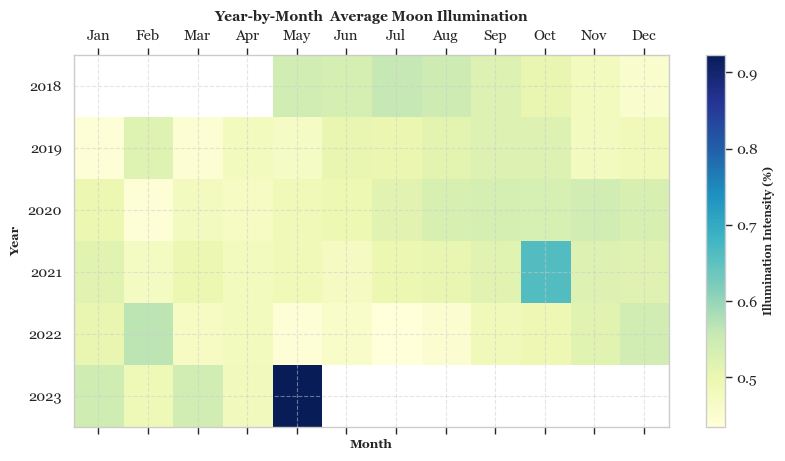

In [102]:
# Group the data by year and month and calculate the average temperature
grouped_moonill = df.groupby(['ObservedYear', 'ObservedMonth'])['MoonIllumintion'].mean()

# Reshape the data into a matrix format
year_matrix_moonill = grouped_moonill.unstack()
# Plot the data matrix
plt.matshow(year_matrix_moonill, interpolation=None, aspect='auto', cmap=plt.cm.YlGnBu)

# Customize the plot
# Set the x-axis tick locations and labels
plt.xticks(np.arange(12), month_names)
# Set the y-axis tick locations and labels
plt.yticks(np.arange(len(year_matrix_moonill.index)), year_matrix_moonill.index)
plt.ylabel('Year', fontsize=9, fontweight='bold')
plt.xlabel('Month', fontsize=9, fontweight='bold')
plt.title('Year-by-Month  Average Moon Illumination', fontsize=10, fontweight='bold')

# Add a color bar
color_bar = plt.colorbar()
color_bar.set_label('Illumination Intensity (%)',fontsize=8, fontweight='bold')
plt.grid(linestyle='--', alpha=0.5)
plt.show()

By observing the plot, we can see patterns and variations in moon illumination intensity over different years and months. For example, during October 2021 and May 2023, the moon's illumination was relatively strong, indicating a brighter and more visible moon during those months compared to other months in the dataset.

In [103]:
#df.drop(columns=['ObservedDate'], inplace=True)

In [104]:
df.CloudCoverage.unique()

array(['0', '3/8 - 4/8', '8/8', '5/8 - 7/8', None], dtype=object)

In [105]:
df.head(6).T

,0,1,2,3,4,5
TemperatureF,55,81,82,73,70,82
DewpointF,37,52,48,52,52,54
FeelsLikeF,55,81,82,73,70,82
HeatIndexF,55,81,82,73,70,82
WindchillF,55,81,82,73,70,82
RelativeHumidity,0.51,0.37,0.30,0.47,0.53,0.37
CurrentConditions,Clear Skies,Scattered,Clear Skies,Clear Skies,Clear Skies,Clear Skies
CurrentConditionsAbbreviation,CLR,SCT,CLR,CLR,CLR,CLR
ConditionType,Clear,Cloudy,Clear,Clear,Clear,Clear
CloudCondition,Clear Skies,Scattered,Clear Skies,Clear Skies,Clear Skies,Clear Skies


In [106]:
df.columns

Index(['TemperatureF', 'DewpointF', 'FeelsLikeF', 'HeatIndexF', 'WindchillF',
       'RelativeHumidity', 'CurrentConditions',
       'CurrentConditionsAbbreviation', 'ConditionType', 'CloudCondition',
       'CloudReport', 'ObservedDate', 'ObservedDay', 'ObservedMonth',
       'ObservedYear', 'PressureInHg', 'CombinedPrecipIn', 'VisibilityMiles',
       'CloudCoverage', 'WindDirection', 'WindSpeed', 'WindSpeedCondition',
       'IsSunUp', 'SunriseHH', 'SunsetHH', 'DaylightDuration', 'MoonPhase',
       'MoonPhaseName', 'MoonIllumintion', 'MoonAge', 'IsMoonUp'],
      dtype='object')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7283 entries, 0 to 7323
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   TemperatureF                   7283 non-null   int32         
 1   DewpointF                      7283 non-null   int32         
 2   FeelsLikeF                     7283 non-null   int32         
 3   HeatIndexF                     7283 non-null   int32         
 4   WindchillF                     7283 non-null   int32         
 5   RelativeHumidity               7283 non-null   float64       
 6   CurrentConditions              7283 non-null   object        
 7   CurrentConditionsAbbreviation  7283 non-null   object        
 8   ConditionType                  7283 non-null   object        
 9   CloudCondition                 7283 non-null   object        
 10  CloudReport                    7283 non-null   object        
 11  ObservedDate     

In [108]:
df.describe()

,TemperatureF,DewpointF,FeelsLikeF,HeatIndexF,WindchillF,RelativeHumidity,ObservedDay,ObservedMonth,ObservedYear,PressureInHg,CombinedPrecipIn,VisibilityMiles,WindSpeed,SunriseHH,SunsetHH,DaylightDuration,MoonPhase,MoonIllumintion,MoonAge
count,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00,7283.00
mean,53.11,43.77,51.50,51.50,51.50,0.74,15.77,6.54,2020.33,30.03,0.27,9.09,5.92,5.95,18.17,12.22,0.50,0.50,14.73
std,20.45,19.11,23.38,23.38,23.38,0.19,8.79,3.43,1.50,0.21,0.38,2.25,4.76,0.76,1.52,2.18,0.29,0.35,8.50
min,-20.00,-29.00,-43.00,-43.00,-43.00,0.14,1.00,1.00,2018.00,29.11,0.00,0.00,0.00,5.00,16.00,9.00,0.00,0.00,0.01
25%,37.00,30.00,34.00,34.00,34.00,0.60,8.00,4.00,2019.00,29.90,0.00,10.00,0.00,5.00,17.00,10.00,0.25,0.15,7.39
50%,52.00,43.00,52.00,52.00,52.00,0.76,16.00,7.00,2020.00,30.02,0.09,10.00,5.70,6.00,19.00,13.00,0.50,0.51,14.71
75%,70.00,61.00,70.00,70.00,70.00,0.89,23.00,9.00,2022.00,30.16,0.44,10.00,9.20,7.00,20.00,15.00,0.75,0.85,22.05
max,97.00,82.00,113.00,113.00,113.00,1.00,31.00,12.00,2023.00,30.85,1.62,10.00,31.10,7.00,20.00,15.00,1.00,1.00,29.53


#### #3. Model Building

df.columns

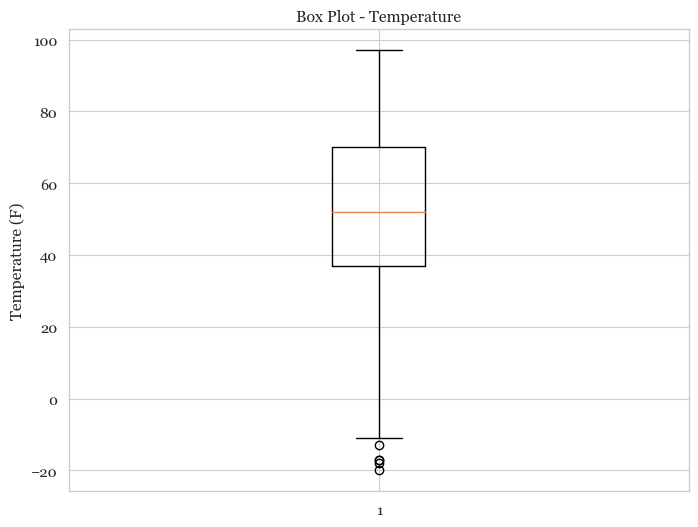

In [109]:
# Create a box plot of the Temperature column
plt.figure(figsize=(8, 6))
plt.boxplot(df['TemperatureF'])
plt.title('Box Plot - Temperature')
plt.ylabel('Temperature (F)')
plt.show()

Sometimes extreme temperature values can occur due to weather conditions, technical issues, or other factors. <p>
Note: *Consulting with weather experts, meteorologists, or climatologists who are familiar with the area and climate conditions who can provide valuable insights into the occurrence of extreme weather events or any other factors that might have caused the outliers*.


***#3.1. Stationary and Trends***

***Dickey-Fuller Test***<p>
Statistical test for testing stationarity;  𝐻0  is that time series is not stationary.

In [110]:
# Extract the 'Temperature' column from your dataframe
temperature = df['TemperatureF']

# Perform the Dickey-Fuller test
result = adfuller(temperature)

# Extract and print the test statistics 
dfoutput = pd.Series(result[0:4], index=['Test Statistic', 'P-value', '#Lags Used', 'Number of Observations Used'])

for key, value in result[4].items():
    dfoutput[f'Critical Value ({key})'] = value

display(dfoutput)

Test Statistic                  -3.43
P-value                          0.01
#Lags Used                      36.00
Number of Observations Used   7246.00
Critical Value (1%)             -3.43
Critical Value (5%)             -2.86
Critical Value (10%)            -2.57
dtype: float64

Based on these results, there is evidence to suggest that the <mark>'TemperatureF'</mark> data is stationary. The low *P-value* and test statistic below the critical values support the rejection of the null hypothesis of non-stationarity.

***#3.2. Seasonal Patterns (Time Series Decomposition)***

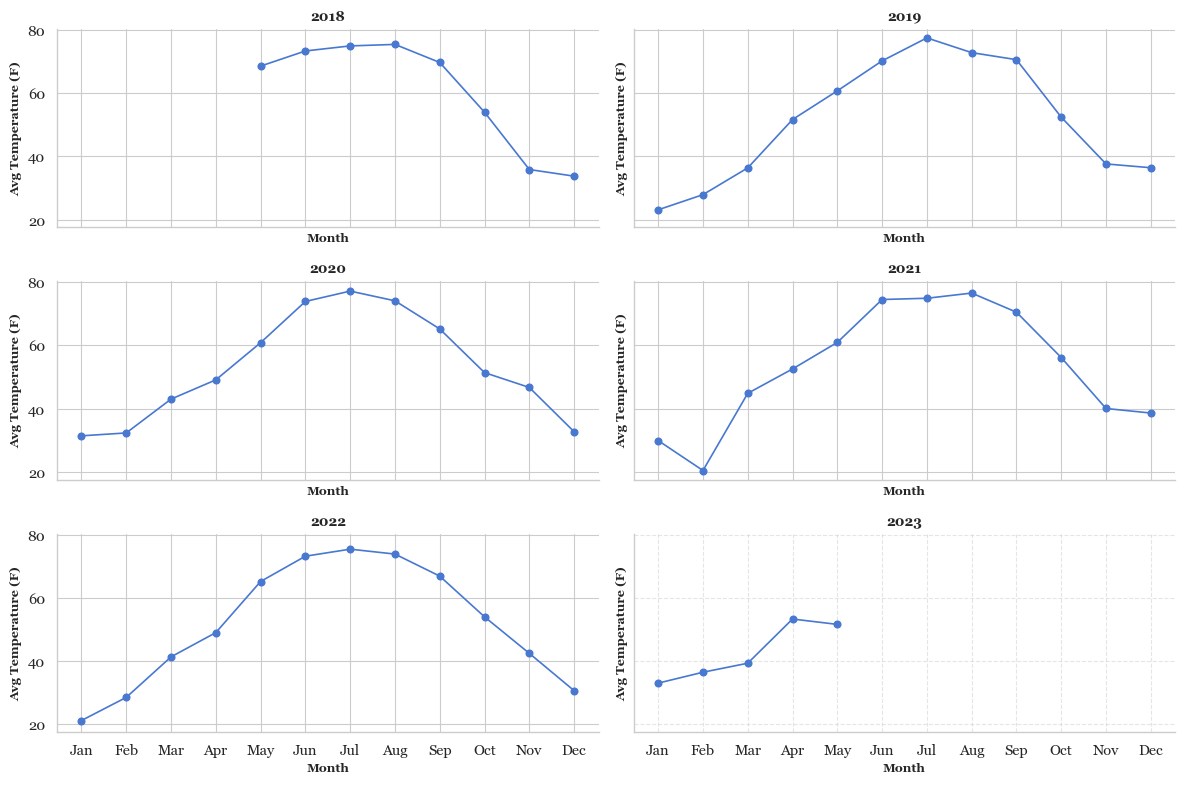

In [111]:
# Group the data by year and month
grouped_data = df.groupby([df['ObservedYear'], df['ObservedMonth']])

# Calculate the average temperature for each year and month
average_temperatures = grouped_data['TemperatureF'].mean()

# Reshape the data to have years as columns and months as rows
reshaped_data = average_temperatures.unstack(level=0)

# Determine the number of rows and columns for subplots
num_years = len(reshaped_data.columns)
num_cols = 2  # Number of subplots per row (adjust as needed)
num_rows = (num_years + num_cols - 1) // num_cols

# Create subplots for each year
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 8), sharex=True, sharey=True)

# Flatten the subplot axes
axs = axs.flatten()
    
    # Iterate over each year and plot in subplots
for i, (year, data) in enumerate(reshaped_data.iteritems()):
    axs[i].plot(data.index, data.values, marker='o')
    axs[i].set_title(str(year), fontsize=10, fontweight='bold')
    axs[i].set_xticks(range(1, 13))
    axs[i].set_xticklabels(calendar.month_abbr[1:13])
    axs[i].set_xlabel('Month',fontsize=9, fontweight='bold')
    axs[i].set_ylabel('Avg Temperature (F)',fontsize=9, fontweight='bold')

plt.tight_layout()
plt.grid(linestyle='--', alpha=0.5)
sns.despine()
plt.show()

In [112]:
df['TemperatureF'].isnull().any()

False

In [113]:
print(df['TemperatureF'].describe())

count   7283.00
mean      53.11
std       20.45
min      -20.00
25%       37.00
50%       52.00
75%       70.00
max       97.00
Name: TemperatureF, dtype: float64


In [114]:
# Interpolate missing values in the time series
#ts = df['TemperatureF'].interpolate(method='linear')


In [115]:
# Assuming you have a time series data in the 'TemperatureF' column of a DataFrame
ts = df['TemperatureF']

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts, model='additive', period=12)

# Retrieve the components of decomposition
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

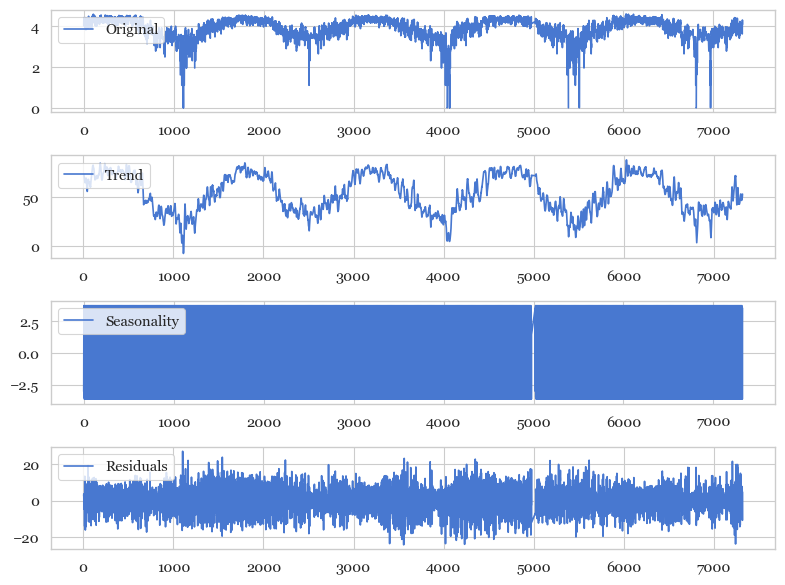

In [116]:
# Plot gathered statistics
plt.figure(figsize=(8,6))
plt.subplot(411)
plt.plot(np.log(ts), label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='upper left')
plt.tight_layout()

Data exhibits both trend and seasonality. The trend component captures the up and down wave-like pattern, indicating fluctuations in the data over time. The strong and fully covered colors in the seasonal component indicate consistent and recurring patterns at regular intervals. The residual component shows residual variations that are not explained by the trend and seasonality, with slight up and down fluctuations.

- Remove Trend and Seasonality: <p>
    
 To further analyze  data, we will consider removing the trend and seasonality to focus on the underlying patterns and variations by using technique of detrending

***#3.3. Building ARIMA Model***

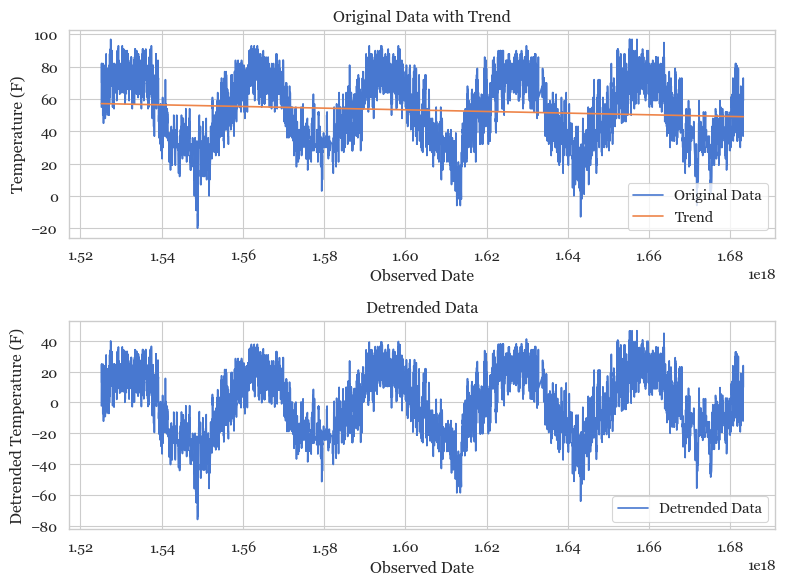

In [117]:
# Step 1: Convert 'ObservedDate' to a numerical format
df['ObservedDate'] = pd.to_datetime(df['ObservedDate'])
df['ObservedDate'] = pd.to_numeric(df['ObservedDate'])

# The remaining steps to fit the trend line, calculate the detrended data, and visualize the results

# Step 2: Fit a trend line
x = df['ObservedDate'].values
y = df['TemperatureF'].values

# Fit a linear regression line
coefficients = np.polyfit(x, y, deg=1)
trend = np.polyval(coefficients, x)

# Step 3: Obtain the detrended data
detrended = y - trend

# Step 4: Analyze the detrended data
plt.figure(figsize=(8,6))
plt.subplot(2, 1, 1)
plt.plot(x, y, label='Original Data')
plt.plot(x, trend, label='Trend')
plt.xlabel('Observed Date')
plt.ylabel('Temperature (F)')
plt.title('Original Data with Trend')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(x, detrended, label='Detrended Data')
plt.xlabel('Observed Date')
plt.ylabel('Detrended Temperature (F)')
plt.title('Detrended Data')
plt.legend()

plt.tight_layout()
plt.show()

In [118]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [119]:
df.columns

Index(['TemperatureF', 'DewpointF', 'FeelsLikeF', 'HeatIndexF', 'WindchillF',
       'RelativeHumidity', 'CurrentConditions',
       'CurrentConditionsAbbreviation', 'ConditionType', 'CloudCondition',
       'CloudReport', 'ObservedDate', 'ObservedDay', 'ObservedMonth',
       'ObservedYear', 'PressureInHg', 'CombinedPrecipIn', 'VisibilityMiles',
       'CloudCoverage', 'WindDirection', 'WindSpeed', 'WindSpeedCondition',
       'IsSunUp', 'SunriseHH', 'SunsetHH', 'DaylightDuration', 'MoonPhase',
       'MoonPhaseName', 'MoonIllumintion', 'MoonAge', 'IsMoonUp'],
      dtype='object')

In [120]:
df.ObservedDate

0       1525154100000000000
1       1525175700000000000
2       1525197300000000000
3       1525218900000000000
4       1525240500000000000
               ...         
7319    1683155700000000000
7320    1683177300000000000
7321    1683196500000000000
7322    1683218100000000000
7323    1683242100000000000
Name: ObservedDate, Length: 7283, dtype: int64

In [121]:
df.ObservedDate

0       1525154100000000000
1       1525175700000000000
2       1525197300000000000
3       1525218900000000000
4       1525240500000000000
               ...         
7319    1683155700000000000
7320    1683177300000000000
7321    1683196500000000000
7322    1683218100000000000
7323    1683242100000000000
Name: ObservedDate, Length: 7283, dtype: int64

In [122]:
df.ObservedDay.dtype

dtype('int64')

In [123]:
df.columns

Index(['TemperatureF', 'DewpointF', 'FeelsLikeF', 'HeatIndexF', 'WindchillF',
       'RelativeHumidity', 'CurrentConditions',
       'CurrentConditionsAbbreviation', 'ConditionType', 'CloudCondition',
       'CloudReport', 'ObservedDate', 'ObservedDay', 'ObservedMonth',
       'ObservedYear', 'PressureInHg', 'CombinedPrecipIn', 'VisibilityMiles',
       'CloudCoverage', 'WindDirection', 'WindSpeed', 'WindSpeedCondition',
       'IsSunUp', 'SunriseHH', 'SunsetHH', 'DaylightDuration', 'MoonPhase',
       'MoonPhaseName', 'MoonIllumintion', 'MoonAge', 'IsMoonUp'],
      dtype='object')

In [124]:
df.TemperatureF.unique()

array([ 55,  81,  82,  73,  70,  79,  75,  64,  72,  68,  66,  61,  50,
        54,  45,  77,  48,  63,  57,  59,  52,  88,  84,  91,  97,  86,
        95,  90,  93,  43,  46,  37,  39,  36,  41,  32,  28,  23,  34,
        30,  21,  27,  16,  19,  25,  18,  14,  12,  10,   9,   5,   0,
         3,  -2,   7,  -9,   1,  -8, -20, -17, -11, -18,  -6, -13,  -4])

In [125]:
df.ObservedDay.dtype

dtype('int64')

In [126]:
df['ObservedDay'] = pd.to_datetime(df['ObservedDay'], format='%d')
df['ObservedMonth'] = pd.to_datetime(df['ObservedMonth'], format='%m')

In [127]:
df.ObservedDay.dtype

dtype('<M8[ns]')

In [128]:
# Prepare the input features and target variable
X = df[['ObservedDay', 'ObservedMonth']]
y = df['TemperatureF']

# Split the data into training and testing sets
train_X = X[:-12].reset_index(drop=True)  # Training features (all except the last 12 months)
train_y = y[:-12].reset_index(drop=True)  # Training target (all except the last 12 months)
test_X = X[-12:].reset_index(drop=True)  # Testing features (last 12 months)
test_y = y[-12:].reset_index(drop=True) # Testing target (last 12 months)

# Define the order of the ARIMA model
p = 2  # autoregressive order
d = 1  # degree of differencing
q = 2  # moving average order

# Fit the ARIMA model to the training data
model = ARIMA(train_y, order=(p, d, q))
arima_model = model.fit()

# Generate predictions for the testing data
predictions = arima_model.predict(start=len(train_y), end=len(train_y) + len(test_y) - 1)

# Reset the index of the testing data for proper alignment
test_y = test_y.reset_index(drop=True)

# Evaluate the ARIMA model's performance
mse = mean_squared_error(test_y, predictions)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 50.86749408784363
Root Mean Squared Error (RMSE): 7.132145125265163


In [129]:
df.ObservedDay.unique()
df.ObservedMonth.unique()

array(['1900-05-01T00:00:00.000000000', '1900-06-01T00:00:00.000000000',
       '1900-07-01T00:00:00.000000000', '1900-08-01T00:00:00.000000000',
       '1900-09-01T00:00:00.000000000', '1900-10-01T00:00:00.000000000',
       '1900-11-01T00:00:00.000000000', '1900-12-01T00:00:00.000000000',
       '1900-01-01T00:00:00.000000000', '1900-02-01T00:00:00.000000000',
       '1900-03-01T00:00:00.000000000', '1900-04-01T00:00:00.000000000'],
      dtype='datetime64[ns]')

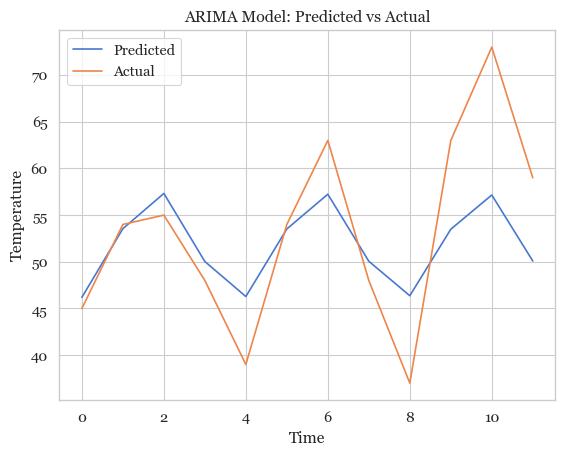

In [130]:
# Plot the predicted values
plt.plot(test_y.index, predictions, label='Predicted')
# Plotting the actual values
plt.plot(test_y.index, test_y, label='Actual')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.title('ARIMA Model: Predicted vs Actual')
plt.legend()
plt.show()

In [131]:
train_X.isnull().sum()

ObservedDay      0
ObservedMonth    0
dtype: int64

In [132]:
# Check the length of the training dataset
print("Number of rows in the training dataset:", len(train_X))

Number of rows in the training dataset: 7271


#### Conclusion  

Based on the results obtained, it is evident that the simple ARIMA model used in this project has limitations in accurately predicting the weather for Joliet, IL in 2024. The obtained Mean Squared Error (MSE) of 50.867 and Root Mean Squared Error (RMSE) of 7.132 indicate a moderate level of accuracy.

Further enhancements and refinements are necessary to improve the model's performance. Consideration should be given to incorporating additional variables, exploring more sophisticated modeling techniques, and leveraging advanced machine learning algorithms specifically designed for time series forecasting.

Despite the limitations of the model, the project successfully achieved its main objective of exploring the provided dataset and gaining valuable insights into historical weather patterns. These insights can be valuable for various applications, including agriculture, tourism, and urban planning, among others.

In conclusion, this project serves as a starting point for future research and development in weather prediction for Joliet, IL. It highlights the need for more advanced modeling approaches and a deeper understanding of the underlying factors that influence weather patterns. By continually refining and expanding upon this work, more accurate and reliable weather predictions can be achieved.